In [82]:
import pandas as pd
import time
from datetime import datetime, timedelta
import numpy as np
import warnings
import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline


In [65]:
df = pd.read_csv('main_dataframe.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2661 entries, 0 to 2660
Data columns (total 44 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             2661 non-null   int64  
 1   Date                   2618 non-null   object 
 2   NVDA Open              2661 non-null   float64
 3   NVDA High              2661 non-null   float64
 4   NVDA Low               2661 non-null   float64
 5   NVDA Close             2661 non-null   float64
 6   NVDA Volume            2661 non-null   int64  
 7   NVDA Daily change      2661 non-null   float64
 8   NVDA Daily change Max  2661 non-null   float64
 9   AAPL Open              2619 non-null   float64
 10  AAPL High              2619 non-null   float64
 11  AAPL Low               2619 non-null   float64
 12  AAPL Close             2619 non-null   float64
 13  AAPL Volume            2619 non-null   float64
 14  AAPL Daily change      2619 non-null   float64
 15  AAPL

In [66]:
df

,Unnamed: 0,Date,NVDA Open,NVDA High,NVDA Low,NVDA Close,NVDA Volume,NVDA Daily change,NVDA Daily change Max,AAPL Open,...,MSFT Volume,MSFT Daily change,MSFT Daily change Max,INTC Open,INTC High,INTC Low,INTC Close,INTC Volume,INTC Daily change,INTC Daily change Max
0,0,"May 06, 2022",187.36,195.12,179.90,186.75,63299300,-0.325576,8.460256,156.01,...,37748300.0,-0.029111,2.941719,44.49,45.15,43.84,44.30,40910000.0,-0.427062,2.988139
1,1,"May 05, 2022",198.67,199.25,185.00,188.44,62633100,-5.149242,7.702703,NaN,...,43260400.0,-2.868250,4.377779,45.60,45.91,44.13,44.60,52996700.0,-2.192982,4.033537
2,2,NaN,199.23,204.00,187.51,203.34,64885500,2.062942,8.794198,163.85,...,33599300.0,2.615096,5.113287,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,"May 04, 2022",194.00,198.25,191.33,196.02,47575100,1.041237,3.616788,159.67,...,25978600.0,-0.767714,1.420667,45.06,46.64,44.41,46.54,44625600.0,3.284510,5.021392
4,4,"May 03, 2022",185.41,195.74,183.91,195.33,57204900,5.350305,6.432494,158.15,...,35151100.0,2.434194,3.156904,44.79,45.49,44.23,45.06,40158400.0,0.602813,2.848745
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2656,2695,"Oct 21, 2011",3.88,3.88,3.71,3.73,61178000,-3.865979,4.582210,14.29,...,76300200.0,-0.807043,3.560606,23.86,24.25,23.80,24.03,123273100.0,0.712490,1.890756
2657,2696,"Oct 20, 2011",3.93,3.97,3.84,3.93,70245200,0.000000,3.385417,14.33,...,42880000.0,-0.876872,1.703073,23.88,23.88,23.35,23.61,88682000.0,-1.130653,2.269807
2658,2697,"Oct 19, 2011",3.63,3.87,3.63,3.87,85483200,6.611570,6.611570,15.06,...,52487900.0,1.373422,2.238806,24.01,24.50,23.86,24.24,139956200.0,0.957934,2.682313
2659,2698,"Oct 18, 2011",3.72,3.73,3.65,3.65,61206400,-1.881720,2.191781,15.06,...,39453300.0,-0.479528,2.122905,23.17,23.49,23.07,23.40,85272200.0,0.992663,1.820546


In [67]:
df.columns

Index(['Unnamed: 0', 'Date', 'NVDA Open', 'NVDA High', 'NVDA Low',
       'NVDA Close', 'NVDA Volume', 'NVDA Daily change',
       'NVDA Daily change Max', 'AAPL Open', 'AAPL High', 'AAPL Low',
       'AAPL Close', 'AAPL Volume', 'AAPL Daily change',
       'AAPL Daily change Max', 'TSLA Open', 'TSLA High', 'TSLA Low',
       'TSLA Close', 'TSLA Volume', 'TSLA Daily change',
       'TSLA Daily change Max', 'AMD Open', 'AMD High', 'AMD Low', 'AMD Close',
       'AMD Volume', 'AMD Daily change', 'AMD Daily change Max', 'MSFT Open',
       'MSFT High', 'MSFT Low', 'MSFT Close', 'MSFT Volume',
       'MSFT Daily change', 'MSFT Daily change Max', 'INTC Open', 'INTC High',
       'INTC Low', 'INTC Close', 'INTC Volume', 'INTC Daily change',
       'INTC Daily change Max'],
      dtype='object')

In [68]:
df.drop('Unnamed: 0', inplace=True, axis=1)

In [70]:
df.columns

Index(['Date', 'NVDA Open', 'NVDA High', 'NVDA Low', 'NVDA Close',
       'NVDA Volume', 'NVDA Daily change', 'NVDA Daily change Max',
       'AAPL Open', 'AAPL High', 'AAPL Low', 'AAPL Close', 'AAPL Volume',
       'AAPL Daily change', 'AAPL Daily change Max', 'TSLA Open', 'TSLA High',
       'TSLA Low', 'TSLA Close', 'TSLA Volume', 'TSLA Daily change',
       'TSLA Daily change Max', 'AMD Open', 'AMD High', 'AMD Low', 'AMD Close',
       'AMD Volume', 'AMD Daily change', 'AMD Daily change Max', 'MSFT Open',
       'MSFT High', 'MSFT Low', 'MSFT Close', 'MSFT Volume',
       'MSFT Daily change', 'MSFT Daily change Max', 'INTC Open', 'INTC High',
       'INTC Low', 'INTC Close', 'INTC Volume', 'INTC Daily change',
       'INTC Daily change Max'],
      dtype='object')

In [71]:
df.dtypes

Date                      object
NVDA Open                float64
NVDA High                float64
NVDA Low                 float64
NVDA Close               float64
NVDA Volume                int64
NVDA Daily change        float64
NVDA Daily change Max    float64
AAPL Open                float64
AAPL High                float64
AAPL Low                 float64
AAPL Close               float64
AAPL Volume              float64
AAPL Daily change        float64
AAPL Daily change Max    float64
TSLA Open                float64
TSLA High                float64
TSLA Low                 float64
TSLA Close               float64
TSLA Volume              float64
TSLA Daily change        float64
TSLA Daily change Max    float64
AMD Open                 float64
AMD High                 float64
AMD Low                  float64
AMD Close                float64
AMD Volume                object
AMD Daily change         float64
AMD Daily change Max     float64
MSFT Open                float64
MSFT High 

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2661 entries, 0 to 2660
Data columns (total 43 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   2618 non-null   object 
 1   NVDA Open              2661 non-null   float64
 2   NVDA High              2661 non-null   float64
 3   NVDA Low               2661 non-null   float64
 4   NVDA Close             2661 non-null   float64
 5   NVDA Volume            2661 non-null   int64  
 6   NVDA Daily change      2661 non-null   float64
 7   NVDA Daily change Max  2661 non-null   float64
 8   AAPL Open              2619 non-null   float64
 9   AAPL High              2619 non-null   float64
 10  AAPL Low               2619 non-null   float64
 11  AAPL Close             2619 non-null   float64
 12  AAPL Volume            2619 non-null   float64
 13  AAPL Daily change      2619 non-null   float64
 14  AAPL Daily change Max  2619 non-null   float64
 15  TSLA

In [73]:
df.describe(include='all')

,Date,NVDA Open,NVDA High,NVDA Low,NVDA Close,NVDA Volume,NVDA Daily change,NVDA Daily change Max,AAPL Open,AAPL High,...,MSFT Volume,MSFT Daily change,MSFT Daily change Max,INTC Open,INTC High,INTC Low,INTC Close,INTC Volume,INTC Daily change,INTC Daily change Max
count,2618,2661.000000,2661.000000,2661.000000,2661.000000,2.661000e+03,2661.000000,2661.000000,2619.000000,2619.000000,...,2.621000e+03,2621.000000,2621.000000,2618.000000,2618.000000,2618.000000,2618.000000,2.618000e+03,2618.000000,2618.000000
unique,2618,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,"May 06, 2022",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,51.924453,52.839827,50.906298,51.900086,4.474950e+07,0.040988,3.080901,52.102875,52.661489,...,3.439964e+07,0.039443,1.839909,39.266696,39.688759,38.859435,39.283174,3.104330e+07,0.056052,2.050200
std,NaN,69.729061,71.123870,68.094074,69.623712,2.600118e+07,2.132779,1.864021,43.473727,44.012740,...,1.796220e+07,1.232491,1.098578,12.412924,12.598493,12.224460,12.410210,1.625089e+07,1.376082,1.230791
min,NaN,2.870000,2.910000,2.790000,2.850000,4.564400e+06,-10.580964,0.723327,13.160000,13.260000,...,7.425600e+06,-5.924658,0.375509,19.520000,19.550000,19.230000,19.360000,5.893800e+06,-6.818865,0.476417
25%,NaN,4.620000,4.670000,4.570000,4.620000,2.803400e+07,-1.050286,1.854116,23.460000,23.665000,...,2.307520e+07,-0.599027,1.167692,28.077500,28.382500,27.832500,28.175000,2.076555e+07,-0.683573,1.312409
50%,NaN,25.570000,25.800000,25.080000,25.420000,3.860800e+07,0.000000,2.569593,32.630000,32.910000,...,3.011220e+07,0.036832,1.548991,35.990000,36.300000,35.630000,35.985000,2.715445e+07,0.062157,1.757764
75%,NaN,61.920000,62.630000,60.920000,61.780000,5.395320e+07,1.151256,3.718948,56.220000,56.765000,...,4.055750e+07,0.733732,2.167644,49.947500,50.720000,49.410000,50.000000,3.625492e+07,0.772890,2.438640


In [74]:
df.dropna(inplace = True, axis=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2548 entries, 0 to 2660
Data columns (total 43 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   2548 non-null   object 
 1   NVDA Open              2548 non-null   float64
 2   NVDA High              2548 non-null   float64
 3   NVDA Low               2548 non-null   float64
 4   NVDA Close             2548 non-null   float64
 5   NVDA Volume            2548 non-null   int64  
 6   NVDA Daily change      2548 non-null   float64
 7   NVDA Daily change Max  2548 non-null   float64
 8   AAPL Open              2548 non-null   float64
 9   AAPL High              2548 non-null   float64
 10  AAPL Low               2548 non-null   float64
 11  AAPL Close             2548 non-null   float64
 12  AAPL Volume            2548 non-null   float64
 13  AAPL Daily change      2548 non-null   float64
 14  AAPL Daily change Max  2548 non-null   float64
 15  TSLA

In [75]:
df.to_csv('main_dataframe.csv') 

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2548 entries, 0 to 2660
Data columns (total 43 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   2548 non-null   object 
 1   NVDA Open              2548 non-null   float64
 2   NVDA High              2548 non-null   float64
 3   NVDA Low               2548 non-null   float64
 4   NVDA Close             2548 non-null   float64
 5   NVDA Volume            2548 non-null   int64  
 6   NVDA Daily change      2548 non-null   float64
 7   NVDA Daily change Max  2548 non-null   float64
 8   AAPL Open              2548 non-null   float64
 9   AAPL High              2548 non-null   float64
 10  AAPL Low               2548 non-null   float64
 11  AAPL Close             2548 non-null   float64
 12  AAPL Volume            2548 non-null   float64
 13  AAPL Daily change      2548 non-null   float64
 14  AAPL Daily change Max  2548 non-null   float64
 15  TSLA

In [79]:
df.describe(include='all')

,Date,NVDA Open,NVDA High,NVDA Low,NVDA Close,NVDA Volume,NVDA Daily change,NVDA Daily change Max,AAPL Open,AAPL High,...,MSFT Volume,MSFT Daily change,MSFT Daily change Max,INTC Open,INTC High,INTC Low,INTC Close,INTC Volume,INTC Daily change,INTC Daily change Max
count,2548,2548.000000,2548.000000,2548.000000,2548.000000,2.548000e+03,2548.000000,2548.000000,2548.000000,2548.000000,...,2.548000e+03,2548.000000,2548.000000,2548.000000,2548.000000,2548.000000,2548.000000,2.548000e+03,2548.000000,2548.000000
unique,2548,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,"May 06, 2022",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,51.714800,52.619717,50.701456,51.679737,4.463448e+07,0.033639,3.074971,52.037374,52.596731,...,3.442481e+07,0.042622,1.837007,39.242857,39.665962,38.834215,39.258611,3.115764e+07,0.057296,2.057388
std,NaN,69.707221,71.075135,68.077964,69.579605,2.584339e+07,2.121161,1.855267,43.445427,43.986220,...,1.810103e+07,1.233471,1.098331,12.420214,12.604412,12.228679,12.412998,1.636571e+07,1.381609,1.238661
min,NaN,2.870000,2.910000,2.790000,2.850000,4.564400e+06,-10.580964,0.723327,13.160000,13.260000,...,7.425600e+06,-5.924658,0.375509,19.520000,19.550000,19.230000,19.360000,5.893800e+06,-6.818865,0.476417
25%,NaN,4.620000,4.670000,4.577500,4.620000,2.799570e+07,-1.048411,1.848530,23.490000,23.677500,...,2.306392e+07,-0.599056,1.167640,28.092500,28.387500,27.837500,28.185000,2.077245e+07,-0.680199,1.315414
50%,NaN,25.080000,25.530000,24.845000,25.190000,3.854270e+07,0.000000,2.565034,32.555000,32.855000,...,3.010960e+07,0.037801,1.548667,35.980000,36.240000,35.575000,35.925000,2.723295e+07,0.071017,1.766775
75%,NaN,61.770000,62.500000,60.650000,61.620000,5.385860e+07,1.145639,3.719994,56.210000,56.737500,...,4.053388e+07,0.730226,2.163127,49.952500,50.735000,49.410000,50.010000,3.635135e+07,0.774221,2.447132


In [83]:
plt.hist(df."COLLANME", bins=50)
plt.xlabel=("COLLANME")
plt.ylabel=("Frequency")

sum(df."COLLANME">x)

import seaborn as sns
sns.boxplot(df.Age)

Q1 = np.percentile(df["COLLANME"], 25)
Q3 = np.percentile(df["COLLANME"], 75)
IQR = Q3 - Q1

Fare_outlier_rows = df[(df[["COLLANME"] < Q1 - 1.5IQR) | (df[["COLLANME"] > Q3 + 1.5IQR )].index

len(Fare_outlier_rows)

SyntaxError: invalid syntax (Temp/ipykernel_3864/4271220203.py, line 1)

(array([528., 618., 258., 288., 200.,  66.,  60.,  58.,  21.,  25.,   2.,
         28.,  67.,  72.,  51.,  52.,  44.,  38.,  40.,  32.]),
 array([ 12.98  ,  21.4315,  29.883 ,  38.3345,  46.786 ,  55.2375,
         63.689 ,  72.1405,  80.592 ,  89.0435,  97.495 , 105.9465,
        114.398 , 122.8495, 131.301 , 139.7525, 148.204 , 156.6555,
        165.107 , 173.5585, 182.01  ]),
 <BarContainer object of 20 artists>)

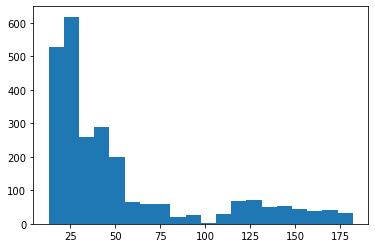

In [90]:
plt.hist(df['AAPL Close'], bins = 20)

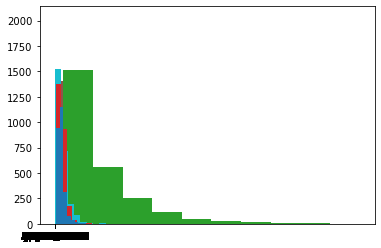

In [89]:




for (columnName, columnData) in df.iteritems():
    #print('Column Name : ', columnName)
    #print('Column Contents : ', columnData.values)
        
    #print(columnName)
    plt.hist(df[columnName], bins = 10)
    
